# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

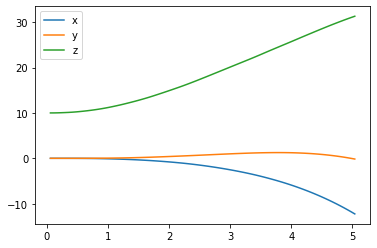

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

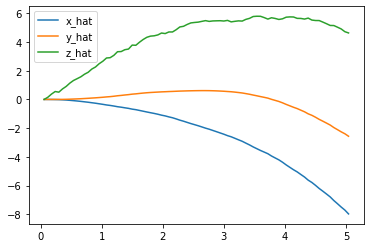

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

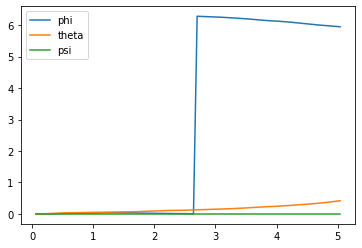

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

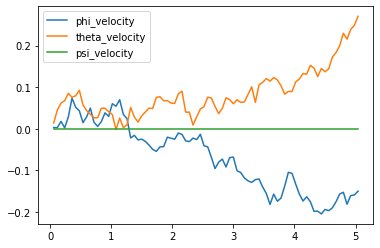

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

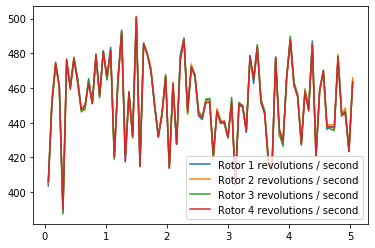

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-12.2498179   -0.16003491  31.30278894   5.9459343    0.41926928
   0.        ]
[-7.97556431 -2.56326203  4.63364925]
[-0.1499831   0.27054203  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
%load_ext autoreload
%autoreload 2

import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            print("Quad's pose: ", task.sim.pose[:3])
            break
    sys.stdout.flush()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Episode =    1, score =  -1.297 (best =  -1.297), noise_scale = 0.05Quad's pose:  [0.87565382 2.19156624 0.        ]
Episode =    2, score =  -1.835 (best =  -1.297), noise_scale = 0.1Quad's pose:  [-1.31325907  3.60027826  0.        ]
Episode =    3, score =  -1.652 (best =  -1.297), noise_scale = 0.2Quad's pose:  [ 5.77566086 -3.59970744  0.        ]
Episode =    4, score =  -4.178 (best =  -1.297), noise_scale = 0.4Quad's pose:  [ 8.12302    -2.42755779  0.        ]
Episode =    5, score =  -4.653 (best =  -1.297), noise_scale = 0.8Quad's pose:  [ 5.28812229 10.21194173  0.        ]
Episode =    6, score =  -2.584 (best =  -1.297), noise_scale = 1.6Quad's pose:  [6.0667121  0.11266818 0.        ]
Episode =    7, score =  -1.963 (best =  -1.297), noise_scale = 3.2Quad's pose:  [ 5.07105911 -2.45571068  0.        ]
Episode =    8, score =  -2.136 (best =  -1.297), noise_scale = 3.2Quad's pose:  [-2

Episode =   70, score =  -4.247 (best =  -0.374), noise_scale = 3.2Quad's pose:  [ 4.87199513 -5.25684541  0.        ]
Episode =   71, score =  -1.848 (best =  -0.374), noise_scale = 3.2Quad's pose:  [0.1266306  3.79356336 0.        ]
Episode =   72, score =  -4.043 (best =  -0.374), noise_scale = 3.2Quad's pose:  [ -1.16097358 -12.06215673   0.        ]
Episode =   73, score =  -1.464 (best =  -0.374), noise_scale = 3.2Quad's pose:  [ 0.60269666 -0.85230278  0.        ]
Episode =   74, score =  -3.320 (best =  -0.374), noise_scale = 3.2Quad's pose:  [ 3.00673181 -5.87773547  0.        ]
Episode =   75, score =  -1.861 (best =  -0.374), noise_scale = 3.2Quad's pose:  [-2.72732598  0.84536055  0.        ]
Episode =   76, score =  -1.594 (best =  -0.374), noise_scale = 3.2Quad's pose:  [2.04960891 0.57515899 0.        ]
Episode =   77, score =  -0.479 (best =  -0.374), noise_scale = 3.2Quad's pose:  [-0.48726601  0.04323494  0.        ]
Episode =   78, score =  -1.747 (best =  -0.374), n

Episode =  140, score =  -1.599 (best =  -0.025), noise_scale = 3.2Quad's pose:  [ 2.51028095 -1.11056088  0.        ]
Episode =  141, score =  -3.461 (best =  -0.025), noise_scale = 3.2Quad's pose:  [ 2.53863001 -5.7688684   0.        ]
Episode =  142, score =  -2.906 (best =  -0.025), noise_scale = 3.2Quad's pose:  [4.81030972 3.27079451 0.        ]
Episode =  143, score =  -0.672 (best =  -0.025), noise_scale = 3.2Quad's pose:  [-3.0802214  -0.37354199  0.        ]
Episode =  144, score =  -4.314 (best =  -0.025), noise_scale = 3.2Quad's pose:  [ 3.33994997 -8.57412844  0.        ]
Episode =  145, score =  -4.009 (best =  -0.025), noise_scale = 3.2Quad's pose:  [-3.3644264  -7.24216917  0.        ]
Episode =  146, score =  -4.534 (best =  -0.025), noise_scale = 3.2Quad's pose:  [-7.59993233 -1.91692105  0.        ]
Episode =  147, score =  -2.020 (best =  -0.025), noise_scale = 3.2Quad's pose:  [5.02627077 0.92388189 0.        ]
Episode =  148, score =  -4.288 (best =  -0.025), nois

Episode =  209, score =  -2.445 (best =   0.016), noise_scale = 3.2Quad's pose:  [-2.2150744   3.09538199  0.        ]
Episode =  210, score =  -0.444 (best =   0.016), noise_scale = 3.2Quad's pose:  [-0.01387925 -1.37989617  0.        ]
Episode =  211, score =  -3.379 (best =   0.016), noise_scale = 3.2Quad's pose:  [0.45887873 9.52725836 0.        ]
Episode =  212, score =  -6.527 (best =   0.016), noise_scale = 3.2Quad's pose:  [ -6.91348081 -19.032415     0.        ]
Episode =  213, score =  -4.401 (best =   0.016), noise_scale = 3.2Quad's pose:  [8.90698286 3.70563126 0.        ]
Episode =  214, score =  -3.405 (best =   0.016), noise_scale = 3.2Quad's pose:  [3.85485184 5.29002509 0.        ]
Episode =  215, score =  -3.113 (best =   0.016), noise_scale = 3.2Quad's pose:  [-4.03331283 -4.32945536  0.        ]
Episode =  216, score =  -3.162 (best =   0.016), noise_scale = 3.2Quad's pose:  [-5.84035961 -2.73634557  0.        ]
Episode =  217, score =  -1.184 (best =   0.016), nois

Episode =  279, score =  -2.929 (best =   0.016), noise_scale = 3.2Quad's pose:  [-3.75125199  2.77782409  0.        ]
Episode =  280, score =  -1.973 (best =   0.016), noise_scale = 3.2Quad's pose:  [ 0.27978085 -5.41611483  0.        ]
Episode =  281, score =  -4.656 (best =   0.016), noise_scale = 3.2Quad's pose:  [-7.50786572 -9.9508695   0.        ]
Episode =  282, score =  -0.431 (best =   0.016), noise_scale = 3.2Quad's pose:  [-1.14712196 -0.1200904   0.        ]
Episode =  283, score =  -1.348 (best =   0.016), noise_scale = 3.2Quad's pose:  [-0.58811455 -2.50623082  0.        ]
Episode =  284, score =  -2.510 (best =   0.016), noise_scale = 3.2Quad's pose:  [0.54101513 5.14910755 0.        ]
Episode =  285, score =  -3.374 (best =   0.016), noise_scale = 3.2Quad's pose:  [-8.58142729 -2.02632237  0.        ]
Episode =  286, score =  -0.936 (best =   0.016), noise_scale = 3.2Quad's pose:  [-3.14428277 -0.35095642  0.        ]
Episode =  287, score =  -2.111 (best =   0.016), n

Episode =  348, score =  -2.041 (best =   0.016), noise_scale = 3.2Quad's pose:  [3.48056705 2.35756737 0.        ]
Episode =  349, score =  -3.539 (best =   0.016), noise_scale = 3.2Quad's pose:  [7.02582011 3.11001289 0.        ]
Episode =  350, score =  -5.571 (best =   0.016), noise_scale = 3.2Quad's pose:  [-8.80686545 -6.23939868  0.        ]
Episode =  351, score =  -5.934 (best =   0.016), noise_scale = 3.2Quad's pose:  [-10.4093013   -9.86915816   0.        ]
Episode =  352, score =  -2.029 (best =   0.016), noise_scale = 3.2Quad's pose:  [-2.98169114  2.38369299  0.        ]
Episode =  353, score =  -5.319 (best =   0.016), noise_scale = 3.2Quad's pose:  [8.02081481 4.76508689 0.        ]
Episode =  354, score =  -3.650 (best =   0.016), noise_scale = 3.2Quad's pose:  [-7.04000109  2.16831357  0.        ]
Episode =  355, score =  -3.196 (best =   0.016), noise_scale = 3.2Quad's pose:  [ 5.27409187 -4.17544138  0.        ]
Episode =  356, score =  -1.069 (best =   0.016), nois

Episode =  418, score =  -1.714 (best =   0.016), noise_scale = 3.2Quad's pose:  [ 2.87886844 -0.83470897  0.        ]
Episode =  419, score =  -5.296 (best =   0.016), noise_scale = 3.2Quad's pose:  [ 8.49739742 -9.56648102  0.        ]
Episode =  420, score =  -3.779 (best =   0.016), noise_scale = 3.2Quad's pose:  [ 7.33878739 -1.98191614  0.        ]
Episode =  421, score =  -4.572 (best =   0.016), noise_scale = 3.2Quad's pose:  [ 1.62752317 13.97241727  0.        ]
Episode =  422, score =  -1.843 (best =   0.016), noise_scale = 3.2Quad's pose:  [-1.14318823  3.11214911  0.        ]
Episode =  423, score =  -2.868 (best =   0.016), noise_scale = 3.2Quad's pose:  [1.48839232 5.41456799 0.        ]
Episode =  424, score =  -0.825 (best =   0.016), noise_scale = 3.2Quad's pose:  [-1.03253437  0.98554303  0.        ]
Episode =  425, score =  -3.749 (best =   0.016), noise_scale = 3.2Quad's pose:  [4.2402873  6.42629185 0.        ]
Episode =  426, score =  -3.646 (best =   0.016), nois

Episode =  488, score =  -1.862 (best =   0.016), noise_scale = 3.2Quad's pose:  [1.22336797 2.86951234 0.        ]
Episode =  489, score =  -2.207 (best =   0.016), noise_scale = 3.2Quad's pose:  [-2.75077653 -2.61361956  0.        ]
Episode =  490, score =  -5.478 (best =   0.016), noise_scale = 3.2Quad's pose:  [5.65152286 8.01467735 0.        ]
Episode =  491, score =  -4.768 (best =   0.016), noise_scale = 3.2Quad's pose:  [-10.94886702  -2.57447561   0.        ]
Episode =  492, score =  -2.753 (best =   0.016), noise_scale = 3.2Quad's pose:  [-3.3979014   4.29044121  0.        ]
Episode =  493, score =  -2.737 (best =   0.016), noise_scale = 3.2Quad's pose:  [-3.31442221 -5.10245344  0.        ]
Episode =  494, score =  -2.145 (best =   0.016), noise_scale = 3.2Quad's pose:  [ 1.29937901 -3.43894561  0.        ]
Episode =  495, score =  -3.180 (best =   0.016), noise_scale = 3.2Quad's pose:  [-2.80876224  4.84143902  0.        ]
Episode =  496, score =  -1.852 (best =   0.016), n

Episode =  558, score =  -2.568 (best =   0.072), noise_scale = 3.2Quad's pose:  [-2.43213277  4.21303828  0.        ]
Episode =  559, score =  -1.330 (best =   0.072), noise_scale = 3.2Quad's pose:  [-0.09339162  3.14107398  0.        ]
Episode =  560, score =  -0.510 (best =   0.072), noise_scale = 3.2Quad's pose:  [1.46023312 0.94339912 0.        ]
Episode =  561, score =  -2.919 (best =   0.072), noise_scale = 3.2Quad's pose:  [5.08301382 1.24892731 0.        ]
Episode =  562, score =  -3.233 (best =   0.072), noise_scale = 3.2Quad's pose:  [-4.87714422 -4.09245019  0.        ]
Episode =  563, score =  -4.334 (best =   0.072), noise_scale = 3.2Quad's pose:  [  4.02387779 -10.55865976   0.        ]
Episode =  564, score =  -1.834 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 2.61116173 -1.43882185  0.        ]
Episode =  565, score =  -1.820 (best =   0.072), noise_scale = 3.2Quad's pose:  [-0.61853046 -2.00397949  0.        ]
Episode =  566, score =  -1.980 (best =   0.072), n

Episode =  628, score =  -2.432 (best =   0.072), noise_scale = 3.2Quad's pose:  [-3.40308185 -4.41830305  0.        ]
Episode =  629, score =  -2.487 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 3.89940153 -2.72524081  0.        ]
Episode =  630, score =  -3.118 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 4.06313514 -3.01150566  0.        ]
Episode =  631, score =  -2.039 (best =   0.072), noise_scale = 3.2Quad's pose:  [-2.22349243 -2.26468084  0.        ]
Episode =  632, score =  -2.556 (best =   0.072), noise_scale = 3.2Quad's pose:  [-4.74866863 -0.0152041   0.        ]
Episode =  633, score =  -0.552 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 1.2404802 -0.9192686  0.       ]
Episode =  634, score =  -1.221 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 1.44820244 -4.03133047  0.        ]
Episode =  635, score =  -4.596 (best =   0.072), noise_scale = 3.2Quad's pose:  [-9.25630838  5.76945794  0.        ]
Episode =  636, score =  -0.353 (best =   0.072), n

Episode =  698, score =  -2.547 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 1.68642238 -3.88548729  0.        ]
Episode =  699, score =  -2.706 (best =   0.072), noise_scale = 3.2Quad's pose:  [-2.79489161  3.21072541  0.        ]
Episode =  700, score =  -7.357 (best =   0.072), noise_scale = 3.2Quad's pose:  [  9.1552919  -14.32991212   0.        ]
Episode =  701, score =  -2.225 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 3.34705441 -1.61086732  0.        ]
Episode =  702, score =  -4.215 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 4.61609218 -7.22853755  0.        ]
Episode =  703, score =  -1.531 (best =   0.072), noise_scale = 3.2Quad's pose:  [-3.16874647 -0.10900878  0.        ]
Episode =  704, score =  -3.165 (best =   0.072), noise_scale = 3.2Quad's pose:  [-4.81695471 -2.1837303   0.        ]
Episode =  705, score =  -1.690 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 0.93852891 -2.27697544  0.        ]
Episode =  706, score =  -2.182 (best =   0.0

Episode =  768, score =  -1.104 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 2.4928681  -2.08763447  0.        ]
Episode =  769, score =  -1.743 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 0.8220726  -4.07592967  0.        ]
Episode =  770, score =  -0.378 (best =   0.072), noise_scale = 3.2Quad's pose:  [-0.80224821  1.65489891  0.        ]
Episode =  771, score =  -2.549 (best =   0.072), noise_scale = 3.2Quad's pose:  [-2.12522909 -5.43251698  0.        ]
Episode =  772, score =  -2.274 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 3.59845716 -1.96304504  0.        ]
Episode =  773, score =  -2.035 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 3.7945654  -1.00845095  0.        ]
Episode =  774, score =  -2.668 (best =   0.072), noise_scale = 3.2Quad's pose:  [-3.00770513  3.90110711  0.        ]
Episode =  775, score =  -1.374 (best =   0.072), noise_scale = 3.2Quad's pose:  [-0.86201629  2.60707985  0.        ]
Episode =  776, score =  -1.580 (best =   0.072)

Episode =  838, score =  -2.008 (best =   0.072), noise_scale = 3.2Quad's pose:  [-2.43713225 -2.60216405  0.        ]
Episode =  839, score =  -0.757 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 0.74928787 -1.1839622   0.        ]
Episode =  840, score =  -4.988 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 9.63992638 -5.9695273   0.        ]
Episode =  841, score =  -3.416 (best =   0.072), noise_scale = 3.2Quad's pose:  [-5.69323393 -4.61441528  0.        ]
Episode =  842, score =  -2.009 (best =   0.072), noise_scale = 3.2Quad's pose:  [-2.77035139  3.3787926   0.        ]
Episode =  843, score =  -5.000 (best =   0.072), noise_scale = 3.2Quad's pose:  [ -3.46420268 -10.84491516   0.        ]
Episode =  844, score =  -2.839 (best =   0.072), noise_scale = 3.2Quad's pose:  [-4.3459916   1.55840374  0.        ]
Episode =  845, score =  -1.975 (best =   0.072), noise_scale = 3.2Quad's pose:  [1.17813725 1.84159287 0.        ]
Episode =  846, score =  -2.148 (best =   0.072)

Episode =  908, score =  -1.338 (best =   0.072), noise_scale = 3.2Quad's pose:  [ 1.30397322 -2.83164161  0.        ]
Episode =  909, score =  -3.543 (best =   0.072), noise_scale = 3.2Quad's pose:  [-4.25669054  5.89604061  0.        ]
Episode =  910, score =  -3.518 (best =   0.072), noise_scale = 3.2Quad's pose:  [-3.71778355  4.82202701  0.        ]
Episode =  911, score =  -1.562 (best =   0.072), noise_scale = 3.2Quad's pose:  [-1.58910433  1.66894458  0.        ]
Episode =  912, score =  -2.608 (best =   0.072), noise_scale = 3.2Quad's pose:  [-2.40618468  3.09435144  0.        ]
Episode =  913, score =  -3.683 (best =   0.072), noise_scale = 3.2Quad's pose:  [-1.2050765   7.25375267  0.        ]
Episode =  914, score =  -0.393 (best =   0.072), noise_scale = 3.2Quad's pose:  [-0.45058669 -1.14915038  0.        ]
Episode =  915, score =  -2.142 (best =   0.072), noise_scale = 3.2Quad's pose:  [1.0773399  6.16727612 0.        ]
Episode =  916, score =  -1.907 (best =   0.072), n

Episode =  978, score =  -0.623 (best =   0.072), noise_scale = 3.2Quad's pose:  [-0.54057178  1.76901011  0.        ]
Episode =  979, score =  -3.286 (best =   0.072), noise_scale = 3.2Quad's pose:  [-3.85022572 -3.98987288  0.        ]
Episode =  980, score =  -1.441 (best =   0.072), noise_scale = 3.2Quad's pose:  [-1.84630914  2.80750479  0.        ]
Episode =  981, score =  -1.164 (best =   0.072), noise_scale = 3.2Quad's pose:  [-0.86494367  0.41045069  0.        ]
Episode =  982, score =  -1.293 (best =   0.072), noise_scale = 3.2Quad's pose:  [1.07074988 1.15593328 0.        ]
Episode =  983, score =  -2.894 (best =   0.072), noise_scale = 3.2Quad's pose:  [-5.21797444 -2.02726611  0.        ]
Episode =  984, score =  -4.088 (best =   0.072), noise_scale = 3.2Quad's pose:  [  0.35086073 -13.03473792   0.        ]
Episode =  985, score =  -2.951 (best =   0.072), noise_scale = 3.2Quad's pose:  [-4.99331452 -2.88724565  0.        ]
Episode =  986, score =  -4.775 (best =   0.072)

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [2]:
%load_ext autoreload
%autoreload 2

import csv, sys
import pandas as pd
import numpy as np
from agents.agent import DDPG
from task import TakeOff

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
num_episodes = 1000
# initialize the position of the Quadcopter little above the ground at z-level 
# when the simulator gets reset. For example, 
# the Quad crashes to the ground if the Quad goes below 0 at z-level.
init_pose = np.array([0., 0., 10., 0., 0., 0.])
target_pos = np.array([0., 0., 100.])
init_angle_velocities = np.array([0., 0., 0.]) 
init_velocities = np.array([0., 0., 0.]) 

labels = ['episode', 'reward', 'mean_reward', 'time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity', 'psi_velocity',
          'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

task = TakeOff(init_pose=init_pose,
               init_velocities=init_velocities,
               init_angle_velocities=init_angle_velocities,
               target_pos=target_pos)

agent = DDPG(task) 
best_score = -np.inf
reward_log = "reward.txt"

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    score = 0
    while True:
            action = agent.act(state) 
            next_state, reward, done = task.step(action)
            agent.step(action, reward, next_state, done)
            state = next_state
            score += reward
            best_score = max(score, best_score)

            to_write = [i_episode] + [score] + [np.mean(score)] + [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(action)
            for label in range(len(labels)):
                results[labels[label]].append(to_write[label])

            if done:
                print("\rEpisode = {:4d}, score = {:7.3f}, best = {:7.3f}) pose = {} rewards survive:{}, distance:{}, velocity:{}".format(
                    i_episode, score, best_score, task.sim.pose[:3], task.rewards['survive'], task.rewards['distance'], task.rewards['velocity']))  # [debug]
                break
            
            sys.stdout.flush()

Episode =    1, score = 401.647, best = 401.647) pose = [-0.21976542 -0.10034215  0.        ] rewards survive:-1.0, distance:0, velocity:0.0
Episode =    2, score = 401.649, best = 401.649) pose = [-0.21913325 -0.10191305  0.        ] rewards survive:-1.0, distance:0, velocity:0.0
Episode =    3, score = 401.648, best = 401.649) pose = [-0.18765012 -0.12996208  0.        ] rewards survive:-1.0, distance:0, velocity:0.0
Episode =    4, score = 377.013, best = 401.649) pose = [0.42699241 0.38563381 0.        ] rewards survive:-1.0, distance:0, velocity:0.0
Episode =    5, score = 423.566, best = 426.566) pose = [-4.39532776e-01  7.72227655e-05  0.00000000e+00] rewards survive:-1.0, distance:0, velocity:0.0
Episode =    6, score = 423.418, best = 426.566) pose = [-5.64428290e-01 -1.89296836e-07  0.00000000e+00] rewards survive:-1.0, distance:0, velocity:0.0
Episode =    7, score = 423.410, best = 426.566) pose = [-5.73594038e-01  4.66768280e-07  0.00000000e+00] rewards survive:-1.0, dista

Episode =   54, score = 3338.182, best = 3524.355) pose = [-21.83679591 -31.48749795 131.25305026] rewards survive:5.0, distance:0, velocity:13.125305025689446
Episode =   55, score = 3332.016, best = 3524.355) pose = [-14.01423697  -8.25554583 137.76256334] rewards survive:5.0, distance:0, velocity:13.776256334297592
Episode =   56, score = 3334.286, best = 3524.355) pose = [ -1.70967427 -29.31837705 134.4069012 ] rewards survive:5.0, distance:0, velocity:13.440690119917685
Episode =   57, score = 3346.446, best = 3524.355) pose = [ 22.94309351 -14.87086371 135.71668764] rewards survive:5.0, distance:0, velocity:13.571668763579058
Episode =   58, score = 3345.942, best = 3524.355) pose = [ 12.22732283 -29.89809356 134.28411848] rewards survive:5.0, distance:0, velocity:13.428411847541717
Episode =   59, score = 3374.143, best = 3524.355) pose = [-23.10646302 -49.275945   122.06693525] rewards survive:5.0, distance:0, velocity:12.206693524780832
Episode =   60, score = 3339.397, best =

Episode =  106, score = 3371.024, best = 3529.824) pose = [-32.38293899 -46.72803829 120.07233572] rewards survive:5.0, distance:0, velocity:12.007233571980956
Episode =  107, score = 3039.811, best = 3529.824) pose = [113.72770151 -87.74290998 300.        ] rewards survive:5.0, distance:0, velocity:30.0
Episode =  108, score = 3342.375, best = 3529.824) pose = [-34.22705505 -16.30006323 131.92386071] rewards survive:5.0, distance:0, velocity:13.192386070908118
Episode =  109, score = 3347.180, best = 3529.824) pose = [ 31.44217987 -16.53061859 136.10445209] rewards survive:5.0, distance:0, velocity:13.610445209101645
Episode =  110, score = 3361.621, best = 3529.824) pose = [ 42.06106794 -46.10061518 152.70980766] rewards survive:5.0, distance:0, velocity:15.270980766260202
Episode =  111, score = 3345.683, best = 3529.824) pose = [ -3.5426928   -3.51676856 138.2095813 ] rewards survive:5.0, distance:0, velocity:13.820958129700106
Episode =  112, score = 3354.181, best = 3529.824) pos

Episode =  158, score = 3341.117, best = 3700.987) pose = [ -7.31033617 -15.5077242  136.89810021] rewards survive:5.0, distance:0, velocity:13.689810021055633
Episode =  159, score = 3395.080, best = 3700.987) pose = [-43.49397358   3.56592939 183.03692788] rewards survive:5.0, distance:0, velocity:18.30369278803253
Episode =  160, score = 744.308, best = 3700.987) pose = [10.1964791   6.55050095  0.        ] rewards survive:-1.0, distance:0, velocity:0.0
Episode =  161, score = 3343.033, best = 3700.987) pose = [ 11.83601734 -27.78683624 134.00763659] rewards survive:5.0, distance:0, velocity:13.400763659406364
Episode =  162, score = 3337.165, best = 3700.987) pose = [ -7.21836223  -1.68787649 138.13466624] rewards survive:5.0, distance:0, velocity:13.813466623669397
Episode =  163, score = 3344.700, best = 3700.987) pose = [-13.11777199   1.69373845 137.60290975] rewards survive:5.0, distance:0, velocity:13.760290974875696
Episode =  164, score = 3684.821, best = 3700.987) pose = [

Episode =  210, score = 3330.118, best = 3711.780) pose = [  0.65101612 -18.45775526 137.36966525] rewards survive:5.0, distance:0, velocity:13.736966524766586
Episode =  211, score = 3370.308, best = 3711.780) pose = [ -8.68201731 -56.15791904 120.00558256] rewards survive:5.0, distance:0, velocity:12.000558255724386
Episode =  212, score = 3335.019, best = 3711.780) pose = [-23.7844179    5.98573374 135.92392092] rewards survive:5.0, distance:0, velocity:13.592392091881983
Episode =  213, score = 3361.684, best = 3711.780) pose = [ 29.42027701 -43.80998868 146.94807122] rewards survive:5.0, distance:0, velocity:14.694807122134618
Episode =  214, score = 3346.316, best = 3711.780) pose = [ 19.13605257 -33.65820907 134.86378462] rewards survive:5.0, distance:0, velocity:13.486378462291249
Episode =  215, score = 3344.886, best = 3711.780) pose = [-44.77304905  -1.20241343 127.52508051] rewards survive:5.0, distance:0, velocity:12.752508051151757
Episode =  216, score = 3344.618, best =

Episode =  262, score = 3349.098, best = 3711.780) pose = [-43.46260023  11.46400563 130.12332051] rewards survive:5.0, distance:0, velocity:13.012332050626066
Episode =  263, score = 3340.700, best = 3711.780) pose = [  9.30954553  18.75339662 136.43565925] rewards survive:5.0, distance:0, velocity:13.6435659252087
Episode =  264, score = 3344.404, best = 3711.780) pose = [-36.38232348  -0.80776206 134.33382397] rewards survive:5.0, distance:0, velocity:13.43338239718207
Episode =  265, score = 3342.939, best = 3711.780) pose = [  6.30354466  28.7882762  136.389292  ] rewards survive:5.0, distance:0, velocity:13.63892919973626
Episode =  266, score = 3353.950, best = 3711.780) pose = [-44.99367461   5.3727268  126.28863736] rewards survive:5.0, distance:0, velocity:12.628863736013534
Episode =  267, score = 3341.178, best = 3711.780) pose = [ 20.69165828  -8.39933144 142.42124427] rewards survive:5.0, distance:0, velocity:14.242124427223203
Episode =  268, score = 3341.480, best = 371

Episode =  314, score = 3334.342, best = 3711.780) pose = [-19.86479526  -9.74054194 136.09232756] rewards survive:5.0, distance:0, velocity:13.609232756177708
Episode =  315, score = 3338.227, best = 3711.780) pose = [-27.47416547  -6.92178451 133.90629258] rewards survive:5.0, distance:0, velocity:13.390629258059185
Episode =  316, score = 3333.552, best = 3711.780) pose = [-32.29093796 -26.08314837 127.9495903 ] rewards survive:5.0, distance:0, velocity:12.794959029591157
Episode =  317, score = 3339.158, best = 3711.780) pose = [-33.37716674  -4.45862066 134.36256297] rewards survive:5.0, distance:0, velocity:13.4362562969356
Episode =  318, score = 3352.422, best = 3711.780) pose = [-30.89952746 -18.95707672 131.18916187] rewards survive:5.0, distance:0, velocity:13.118916187189896
Episode =  319, score = 3347.537, best = 3711.780) pose = [-17.36202716 -20.16968059 135.30727486] rewards survive:5.0, distance:0, velocity:13.530727485802112
Episode =  320, score = 3341.828, best = 3

Episode =  366, score = 3357.912, best = 3711.780) pose = [-51.88339867 -10.88904074 122.07870693] rewards survive:5.0, distance:0, velocity:12.20787069268318
Episode =  367, score = 3546.754, best = 3711.780) pose = [-75.99304942  -4.06445491 112.03442485] rewards survive:5.0, distance:0, velocity:11.203442484858137
Episode =  368, score = 3343.981, best = 3711.780) pose = [ 15.52051462   8.06453243 144.42159359] rewards survive:5.0, distance:0, velocity:14.442159359242915
Episode =  369, score = 3332.267, best = 3711.780) pose = [-11.48929973   3.17685386 138.39391772] rewards survive:5.0, distance:0, velocity:13.839391771718386
Episode =  370, score = 3404.222, best = 3711.780) pose = [-66.1325281   18.83402994 181.9741791 ] rewards survive:5.0, distance:0, velocity:18.197417909836677
Episode =  371, score = 3342.473, best = 3711.780) pose = [ -7.87618282  13.76771948 148.70356674] rewards survive:5.0, distance:0, velocity:14.870356674174232
Episode =  372, score = 3331.663, best = 

Episode =  418, score = 3359.797, best = 3711.780) pose = [ 14.01887883 -41.6627119  128.4632567 ] rewards survive:5.0, distance:0, velocity:12.846325669893492
Episode =  419, score = 3384.457, best = 3711.780) pose = [-55.22510354   2.56393196 120.05645692] rewards survive:5.0, distance:0, velocity:12.00564569153162
Episode =  420, score = 3353.721, best = 3711.780) pose = [ 18.31078084   6.31994502 146.96510997] rewards survive:5.0, distance:0, velocity:14.696510996882541
Episode =  421, score = 3352.867, best = 3711.780) pose = [ -7.41613161  19.9218984  138.90246233] rewards survive:5.0, distance:0, velocity:13.890246233216729
Episode =  422, score = 3340.189, best = 3711.780) pose = [-32.12288065  16.1580057  133.37388319] rewards survive:5.0, distance:0, velocity:13.337388319455451
Episode =  423, score = 3355.934, best = 3711.780) pose = [ 11.78630683 -59.30349507 135.44832407] rewards survive:5.0, distance:0, velocity:13.544832407433034
Episode =  424, score = 3340.622, best = 

Episode =  470, score = 3433.368, best = 3711.780) pose = [ 61.34757917  32.32325155 196.7568328 ] rewards survive:5.0, distance:0, velocity:19.67568327958806
Episode =  471, score = 3344.601, best = 3711.780) pose = [ 29.82583916  -6.0635134  144.22657808] rewards survive:5.0, distance:0, velocity:14.422657807646463
Episode =  472, score = 3348.892, best = 3711.780) pose = [ 25.90698768 -14.79636463 136.00974379] rewards survive:5.0, distance:0, velocity:13.600974378615764
Episode =  473, score = 3355.895, best = 3711.780) pose = [-57.41396469  -5.0168101  122.41276662] rewards survive:5.0, distance:0, velocity:12.241276661823324
Episode =  474, score = 3349.518, best = 3711.780) pose = [-35.66197354 -13.34482168 130.99515272] rewards survive:5.0, distance:0, velocity:13.099515272195077
Episode =  475, score = 3339.964, best = 3711.780) pose = [  9.20538596  -9.13648154 138.0929123 ] rewards survive:5.0, distance:0, velocity:13.80929122953527
Episode =  476, score = 3346.169, best = 3

Episode =  522, score = 3340.786, best = 3726.103) pose = [ -3.94528467 -43.21061845 128.39340898] rewards survive:5.0, distance:0, velocity:12.839340897630542
Episode =  523, score = 3349.743, best = 3726.103) pose = [-24.75808715  14.42458861 152.5873856 ] rewards survive:5.0, distance:0, velocity:15.258738560224373
Episode =  524, score = 3547.921, best = 3726.103) pose = [-46.50952651 -48.08230555 111.78585178] rewards survive:5.0, distance:0, velocity:11.178585178110156
Episode =  525, score = 3344.481, best = 3726.103) pose = [-28.79324596 -20.66734024 131.8976504 ] rewards survive:5.0, distance:0, velocity:13.189765039593453
Episode =  526, score = 3366.106, best = 3726.103) pose = [-21.79266516 -48.5723184  122.20300025] rewards survive:5.0, distance:0, velocity:12.22030002510972
Episode =  527, score = 3438.526, best = 3726.103) pose = [-62.8280191   -9.53555202 115.48802023] rewards survive:5.0, distance:0, velocity:11.548802023166894
Episode =  528, score = 3342.608, best = 

Episode =  574, score = 3341.925, best = 3726.103) pose = [ 17.13484339  14.87254201 136.77931632] rewards survive:5.0, distance:0, velocity:13.677931632458973
Episode =  575, score = 3332.864, best = 3726.103) pose = [ 22.33916365   2.03359827 139.25581179] rewards survive:5.0, distance:0, velocity:13.92558117856267
Episode =  576, score = 3369.092, best = 3726.103) pose = [ 25.5270467   17.91479094 161.53138577] rewards survive:5.0, distance:0, velocity:16.15313857694759
Episode =  577, score = 3345.543, best = 3726.103) pose = [ -9.85737204 -11.16996095 137.70714019] rewards survive:5.0, distance:0, velocity:13.770714019007116
Episode =  578, score = 3340.169, best = 3726.103) pose = [-12.2880727   15.18297691 138.07369886] rewards survive:5.0, distance:0, velocity:13.807369885633372
Episode =  579, score = 3377.493, best = 3726.103) pose = [ 27.30048212 -12.33309773 170.49890098] rewards survive:5.0, distance:0, velocity:17.04989009846758
Episode =  580, score = 3364.536, best = 37

Episode =  626, score = 3344.506, best = 3726.103) pose = [-16.35352972  -2.0380798  137.8542324 ] rewards survive:5.0, distance:0, velocity:13.785423239830099
Episode =  627, score = 3342.819, best = 3726.103) pose = [  9.34905059 -23.07469644 135.28280423] rewards survive:5.0, distance:0, velocity:13.52828042285041
Episode =  628, score = 3344.891, best = 3726.103) pose = [ 19.92773951  -3.4780675  137.47929579] rewards survive:5.0, distance:0, velocity:13.747929579370126
Episode =  629, score = 3345.449, best = 3726.103) pose = [ 17.09422296  13.09250983 142.55699193] rewards survive:5.0, distance:0, velocity:14.255699193075962
Episode =  630, score = 3345.452, best = 3726.103) pose = [ -3.80002584 -33.90145369 132.5624767 ] rewards survive:5.0, distance:0, velocity:13.256247669739452
Episode =  631, score = 3546.004, best = 3726.103) pose = [ 20.28069003 -74.29458059  89.24229414] rewards survive:5.0, distance:0, velocity:8.924229414428241
Episode =  632, score = 3346.725, best = 3

Episode =  678, score = 3369.993, best = 3726.103) pose = [ 14.10483845 -47.66709104 125.15444748] rewards survive:5.0, distance:0, velocity:12.515444747597181
Episode =  679, score = 3339.130, best = 3726.103) pose = [ 12.84469842 -48.94001635 135.77997644] rewards survive:5.0, distance:0, velocity:13.57799764355886
Episode =  680, score = 3347.849, best = 3726.103) pose = [-24.60763311  23.22286152 144.79231883] rewards survive:5.0, distance:0, velocity:14.479231882512176
Episode =  681, score = 3495.415, best = 3726.103) pose = [ 44.82656351 -53.51136486 267.06297298] rewards survive:5.0, distance:0, velocity:26.706297297909657
Episode =  682, score = 3341.159, best = 3726.103) pose = [ -5.50393818 -20.28936844 136.24984767] rewards survive:5.0, distance:0, velocity:13.624984766637176
Episode =  683, score = 3593.875, best = 3726.103) pose = [ 33.55506709 -71.98602886  92.1643252 ] rewards survive:5.0, distance:10, velocity:9.21643252038305
Episode =  684, score = 3339.395, best = 3

Episode =  730, score = 3336.466, best = 3726.103) pose = [ -6.66805806   5.84821339 138.08763261] rewards survive:5.0, distance:0, velocity:13.80876326123626
Episode =  731, score = 3344.367, best = 3726.103) pose = [-13.17702697 -41.50719969 127.96069392] rewards survive:5.0, distance:0, velocity:12.796069392059644
Episode =  732, score = 3348.108, best = 3726.103) pose = [ 13.07703152 -31.42923166 132.92498182] rewards survive:5.0, distance:0, velocity:13.292498182373059
Episode =  733, score = 3340.114, best = 3726.103) pose = [  3.18793955   0.45917688 139.15874063] rewards survive:5.0, distance:0, velocity:13.915874062504727
Episode =  734, score = 3348.030, best = 3726.103) pose = [ 19.23291217 -43.66972765 125.85684126] rewards survive:5.0, distance:0, velocity:12.585684125617899
Episode =  735, score = 3425.787, best = 3726.103) pose = [ -2.88005678 -63.25351286 116.7727717 ] rewards survive:5.0, distance:0, velocity:11.677277170219966
Episode =  736, score = 3341.128, best = 

Episode =  782, score = 3334.254, best = 3726.103) pose = [ 17.76052443 -26.00180829 135.43481131] rewards survive:5.0, distance:0, velocity:13.543481131345548
Episode =  783, score = 3385.664, best = 3726.103) pose = [ 15.01497844 -54.46419865 121.45149099] rewards survive:5.0, distance:0, velocity:12.145149099215315
Episode =  784, score = 3438.834, best = 3726.103) pose = [  3.40556236 -59.46664723 112.27315618] rewards survive:5.0, distance:0, velocity:11.227315618428234
Episode =  785, score = 3345.990, best = 3726.103) pose = [ 19.81062351  13.79055475 144.22890183] rewards survive:5.0, distance:0, velocity:14.422890183122858
Episode =  786, score = 3339.422, best = 3726.103) pose = [  8.22317863 -30.43499385 133.52323857] rewards survive:5.0, distance:0, velocity:13.352323857220213
Episode =  787, score = 3357.370, best = 3726.103) pose = [ 25.78425735  23.09188638 151.18258638] rewards survive:5.0, distance:0, velocity:15.118258637995305
Episode =  788, score = 3332.501, best =

Episode =  834, score = 3353.640, best = 3726.103) pose = [ 15.52196037 -22.34671044 135.40307256] rewards survive:5.0, distance:0, velocity:13.540307256285807
Episode =  835, score = 3339.268, best = 3726.103) pose = [ -0.85392226   3.71417648 141.66802321] rewards survive:5.0, distance:0, velocity:14.166802320935993
Episode =  836, score = 3341.935, best = 3726.103) pose = [  2.96958168  19.69709227 143.14335168] rewards survive:5.0, distance:0, velocity:14.314335168351029
Episode =  837, score = 3338.657, best = 3726.103) pose = [  9.35789604  27.25775963 139.47739488] rewards survive:5.0, distance:0, velocity:13.947739488448915
Episode =  838, score = 3414.469, best = 3726.103) pose = [150. 150. 300.] rewards survive:5.0, distance:0, velocity:30.0
Episode =  839, score = 2789.885, best = 3726.103) pose = [  1.26496729 -84.60102086  77.18760024] rewards survive:5.0, distance:0, velocity:7.718760023527039
Episode =  840, score = 3339.176, best = 3726.103) pose = [-23.18773439 -27.288

Episode =  886, score = 3458.876, best = 3726.103) pose = [-34.42175213 -56.43469662 113.29048664] rewards survive:5.0, distance:0, velocity:11.329048663677954
Episode =  887, score = 3359.584, best = 3726.103) pose = [ 33.87419151  -9.44402207 149.296007  ] rewards survive:5.0, distance:0, velocity:14.929600699559458
Episode =  888, score = 3338.039, best = 3726.103) pose = [-27.94304427 -24.64450902 131.1516972 ] rewards survive:5.0, distance:0, velocity:13.115169720303221
Episode =  889, score = 3355.467, best = 3726.103) pose = [ 43.63542102 -48.40503574 134.07549674] rewards survive:5.0, distance:0, velocity:13.407549674315554
Episode =  890, score = 3334.228, best = 3726.103) pose = [-17.94859082 -19.8963686  134.85800012] rewards survive:5.0, distance:0, velocity:13.485800011745415
Episode =  891, score = 3337.001, best = 3726.103) pose = [ -8.30791031  23.3730697  141.30312831] rewards survive:5.0, distance:0, velocity:14.130312831460282
Episode =  892, score = 3347.068, best =

Episode =  938, score = 3353.967, best = 3726.103) pose = [  1.60787141  23.75376039 151.79182732] rewards survive:5.0, distance:0, velocity:15.179182732354906
Episode =  939, score = 3343.530, best = 3726.103) pose = [ -6.27372358 -10.19228669 137.57083664] rewards survive:5.0, distance:0, velocity:13.757083663505682
Episode =  940, score = 3335.340, best = 3726.103) pose = [-10.11784453  10.21592522 140.47814937] rewards survive:5.0, distance:0, velocity:14.047814937079949
Episode =  941, score = 3344.624, best = 3726.103) pose = [ -1.48434935  -6.91746649 141.31687609] rewards survive:5.0, distance:0, velocity:14.131687608775406
Episode =  942, score = 3351.098, best = 3726.103) pose = [-39.44398891  -7.39337325 129.43813147] rewards survive:5.0, distance:0, velocity:12.94381314727481
Episode =  943, score = 3384.655, best = 3726.103) pose = [-27.51684272 121.65233816 300.        ] rewards survive:5.0, distance:0, velocity:30.0
Episode =  944, score = 3351.761, best = 3726.103) pose

Episode =  990, score = 3332.754, best = 3726.103) pose = [ 20.828917   -24.9054817  139.33648876] rewards survive:5.0, distance:0, velocity:13.933648876137037
Episode =  991, score = 3431.521, best = 3726.103) pose = [-19.0753614   41.5680931  203.67438392] rewards survive:5.0, distance:0, velocity:20.36743839154881
Episode =  992, score = 3342.000, best = 3726.103) pose = [ 21.56371074   9.10860218 141.90832881] rewards survive:5.0, distance:0, velocity:14.190832880810252
Episode =  993, score = 3331.860, best = 3726.103) pose = [-33.87347386   5.1872728  131.17709787] rewards survive:5.0, distance:0, velocity:13.117709786870359
Episode =  994, score = 3332.673, best = 3726.103) pose = [-17.64857261   3.06467939 137.83808202] rewards survive:5.0, distance:0, velocity:13.783808202031608
Episode =  995, score = 3421.042, best = 3726.103) pose = [ 17.37852421 -19.88286361 189.53365787] rewards survive:5.0, distance:0, velocity:18.953365786694558
Episode =  996, score = 3338.372, best = 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

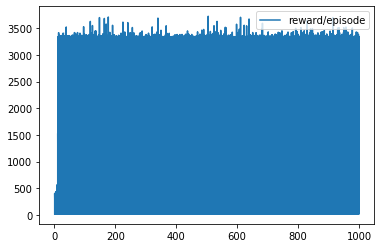

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['episode'], results['mean_reward'], label='reward/episode')
plt.legend()
_ = plt.ylim()

/usr/local/Cellar/jupyter/1.0.0_5/libexec/vendor/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/Cellar/jupyter/1.0.0_5/libexec/vendor/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


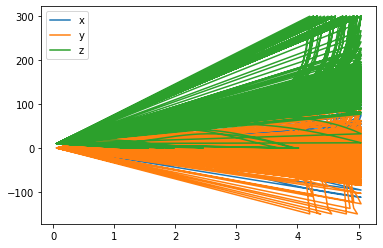

In [29]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()

/usr/local/Cellar/jupyter/1.0.0_5/libexec/vendor/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/Cellar/jupyter/1.0.0_5/libexec/vendor/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


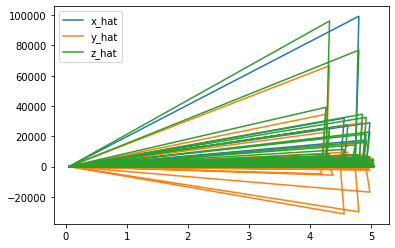

In [30]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

/usr/local/Cellar/jupyter/1.0.0_5/libexec/vendor/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/Cellar/jupyter/1.0.0_5/libexec/vendor/lib/python3.7/site-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


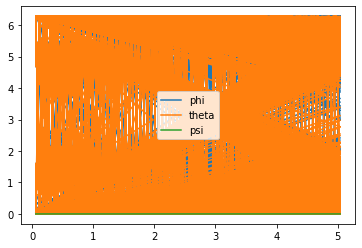

In [31]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: 

I chose to implement the TakeOff task with the Quadcopter starting on the ground targeting height of 100. I modified the reward function fron the standard Task with the following:
- Reward
 - Constant flight: +100
 - Flight within 10 of target: +500
- Penalties:
 - Rocky takeoffs (euler angles)
 - Distance from target (Absolute Squared Error)
 - TODO: penalize short flights
 
 

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

Given that this problem is in the continuous action domain, and has a large action/state space, I chose to Implement the DDPG algorithm. It also helped that Udacity had a baseline DDPG algorithm as well as an Actor and Critic agent that could be adopted with minimal changes. 

I use an experience replay buffer to store the state, action, reward, and next_state tuple of our observations as opposed to discarding them. The buffer allows me to learn from rare occurrences multiples times and break the correlation of sequential tuples by sampling a small batch at random from the buffer. 

Experience replay will break the correlation of sequential tuples however I use fixed Q-Targets to break the relationship between the target and the parameters we are changing (don't teach a donkey to walk while sitting on it). Since each action affects the next position of the target in a complicated manner, we fix the target's position (don't change during the learning step ) decoupling it from our actions and in turn, creating a more stable learning environment. 

To mitigate against being stuck in a local optimum, I use the Ornstein–Uhlenbeck Noise process which converges to a specified mean over time and randomly samples from a normal distribution.  OU 's consecutive samples are close together  (limit wild variations) they are ideal for our actions which translate to force and torque. 

Discount Factor (gamma): In this problem, I want the agent to prioritize long term rewards, I set a high gamma of.99 to reflect that.


 
#### Networks:
### Actor: 
     - state as input layer
     - 3 Dense layers with relu activation. (32,64,32)
     - Dense layer for output based on the action size 
     - Use sigmoid activation function to scale raw output [0.0, 1.0] to produce a deterministic action for any given state vector
### Critic:
  - State/action as input layers
  - Add hidden layer(s) for state/action pathway
  - Combine state/action pathways into one layer and use relu activation
 


**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

- After ~12 episodes my agent learned the task however looking at the reward chart i fear there is some overfitting.
- Mean reward for the final 10 episodes was very strong and hovered around 3,500

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

- Tweaking the reward function was the hardest part of the project as I have not fully devloped my intution for it yet. Reading through the DDP and Task sample was extremely helpful as I could translate the code back to the videos from previous lessons.
- I am surprised at the the learning wasn't gradual and spiked and that it was so quick. I would have expected the agent to tumble around more gradually. Instead it almost appears as if it learned how to fly overnight.